#Uso de software para búsqueda
Pedro Antonio Mendoza Rivera 2008344 N1

Empezamos por declarar las librerias a utilizar

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.15.0


Se importan los datos del MNIST

In [5]:
keras.datasets.mnist.load_data(path="mnist.npz")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

11490434/11490434 [==============================] - 0s 0us/step


Se le asignan los nombres a cada uno de los conjuntos de datos del 0 al 9

In [6]:
class_names = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis', 'Siete','Ocho', 'Nueve']

Se explora el set de datos con el que se entrenara el modelo

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
len(y_train)

60000

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
x_test.shape

(10000, 28, 28)

In [11]:
len(y_test)

10000

Preprocesamiento de datos

<function matplotlib.pyplot.show(close=None, block=None)>

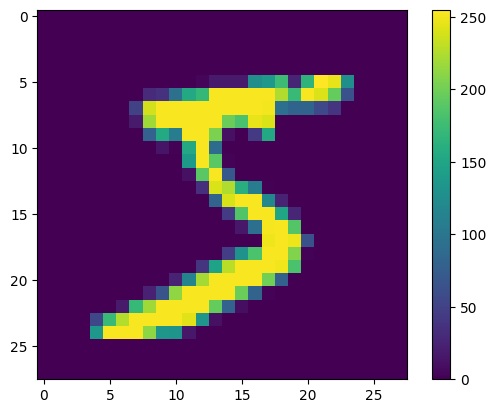

In [12]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show

In [13]:
x_train = x_train / 255.0
x_test = x_test / 255.0

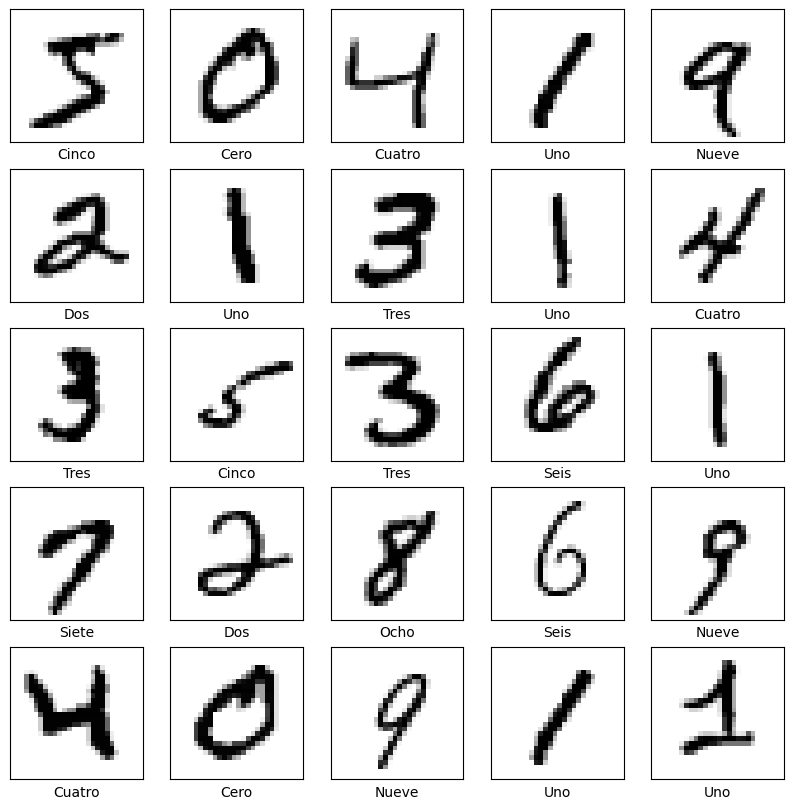

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])
plt.show()

Se construye el modelo de red neuronal, donde se configuran las capas del modelo

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Se compila el modelo entrenado

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Se entrena el modelo

In [17]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2547 - accuracy: 0.9275
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1126 - accuracy: 0.9667
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0794 - accuracy: 0.9759
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0587 - accuracy: 0.9820
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0458 - accuracy: 0.9855
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0365 - accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0290 - accuracy: 0.9911
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0241 - accuracy: 0.9921
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0186 - accuracy: 0.9943
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.015

Se evalua la exactitud del modelo

In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0832 - accuracy: 0.9774 - 721ms/epoch - 2ms/step

Test accuracy: 0.977400004863739


Se empiezan a realizar las predicciones

In [19]:
predicciones = model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


Predicción 1

In [20]:
predicciones[0]

array([7.0226175e-10, 1.1215936e-11, 1.5186593e-08, 1.2772075e-06,
       1.8892259e-13, 5.0562338e-10, 3.3386085e-14, 9.9998719e-01,
       4.4704979e-08, 1.1437852e-05], dtype=float32)

In [21]:
np.argmax(predicciones[0])

7

In [ ]:
y_test[0]

7

Predicción 2

In [22]:
predicciones[5]

array([1.3250255e-11, 9.9991649e-01, 7.0712126e-08, 8.6621952e-08,
       1.8489625e-07, 2.0965489e-10, 1.7446551e-08, 8.1762089e-05,
       1.3219216e-06, 3.6849518e-10], dtype=float32)

In [23]:
np.argmax(predicciones[5])

1

In [ ]:
y_test[5]

1

Predicción 3

In [24]:
predicciones[9]

array([6.0482767e-14, 9.5830090e-18, 2.0805380e-15, 9.4695469e-09,
       6.7495788e-04, 3.1334180e-12, 5.6893746e-15, 1.0019594e-04,
       2.8941395e-07, 9.9922460e-01], dtype=float32)

In [25]:
np.argmax(predicciones[9])

9

In [ ]:
y_test[9]

9

Predicción 4

In [26]:
predicciones[24]

array([9.7783670e-10, 2.7754625e-09, 1.4792031e-08, 1.9078758e-10,
       9.9996513e-01, 4.1305814e-08, 7.8467490e-09, 8.6258988e-06,
       1.3311209e-08, 2.6053998e-05], dtype=float32)

In [27]:
np.argmax(predicciones[24])

4

In [ ]:
y_test[24]

4

Predicción 5

In [28]:
predicciones[3458]

array([9.9999970e-01, 2.2912849e-15, 1.5662670e-09, 7.3830065e-12,
       5.9141059e-10, 3.3490357e-09, 2.0335587e-07, 1.2512744e-08,
       6.0606589e-11, 4.9833929e-08], dtype=float32)

In [29]:
np.argmax(predicciones[3458])

0

In [30]:
y_test[3458]

0

Se grafica para poder ver todo el set de la prediccion de las 10 clases.

In [31]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Grafica de la predicción 1

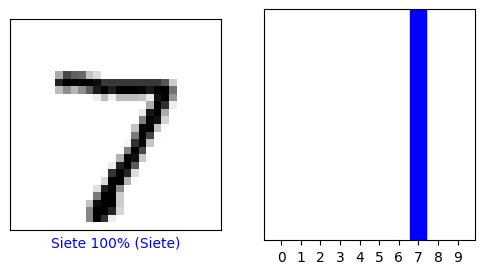

In [32]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predicciones[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predicciones[i],  y_test)
plt.show()

Grafica predicción 2

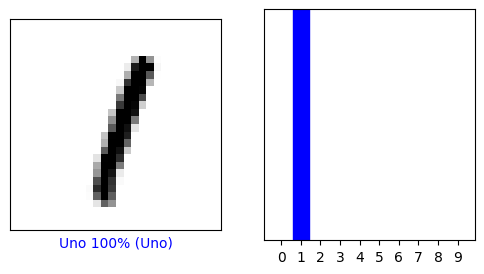

In [33]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predicciones[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predicciones[i],  y_test)
plt.show()

Grafica predicción 3

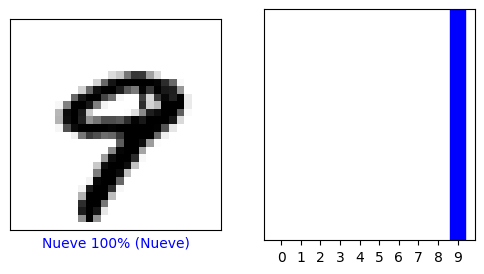

In [34]:
i = 9
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predicciones[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predicciones[i],  y_test)
plt.show()

Grafica prediccion 4

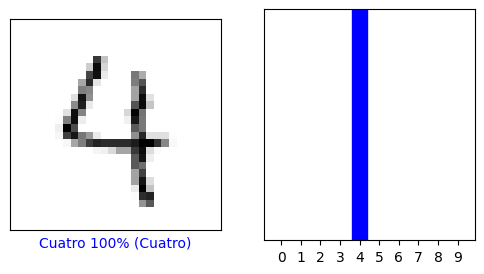

In [35]:
i = 24
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predicciones[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predicciones[i],  y_test)
plt.show()

Grafica predicción 5

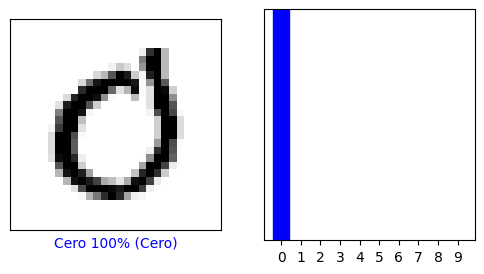

In [36]:
i = 3458
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predicciones[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predicciones[i],  y_test)
plt.show()

Vamos a graficar multiples imagenes con sus predicciones

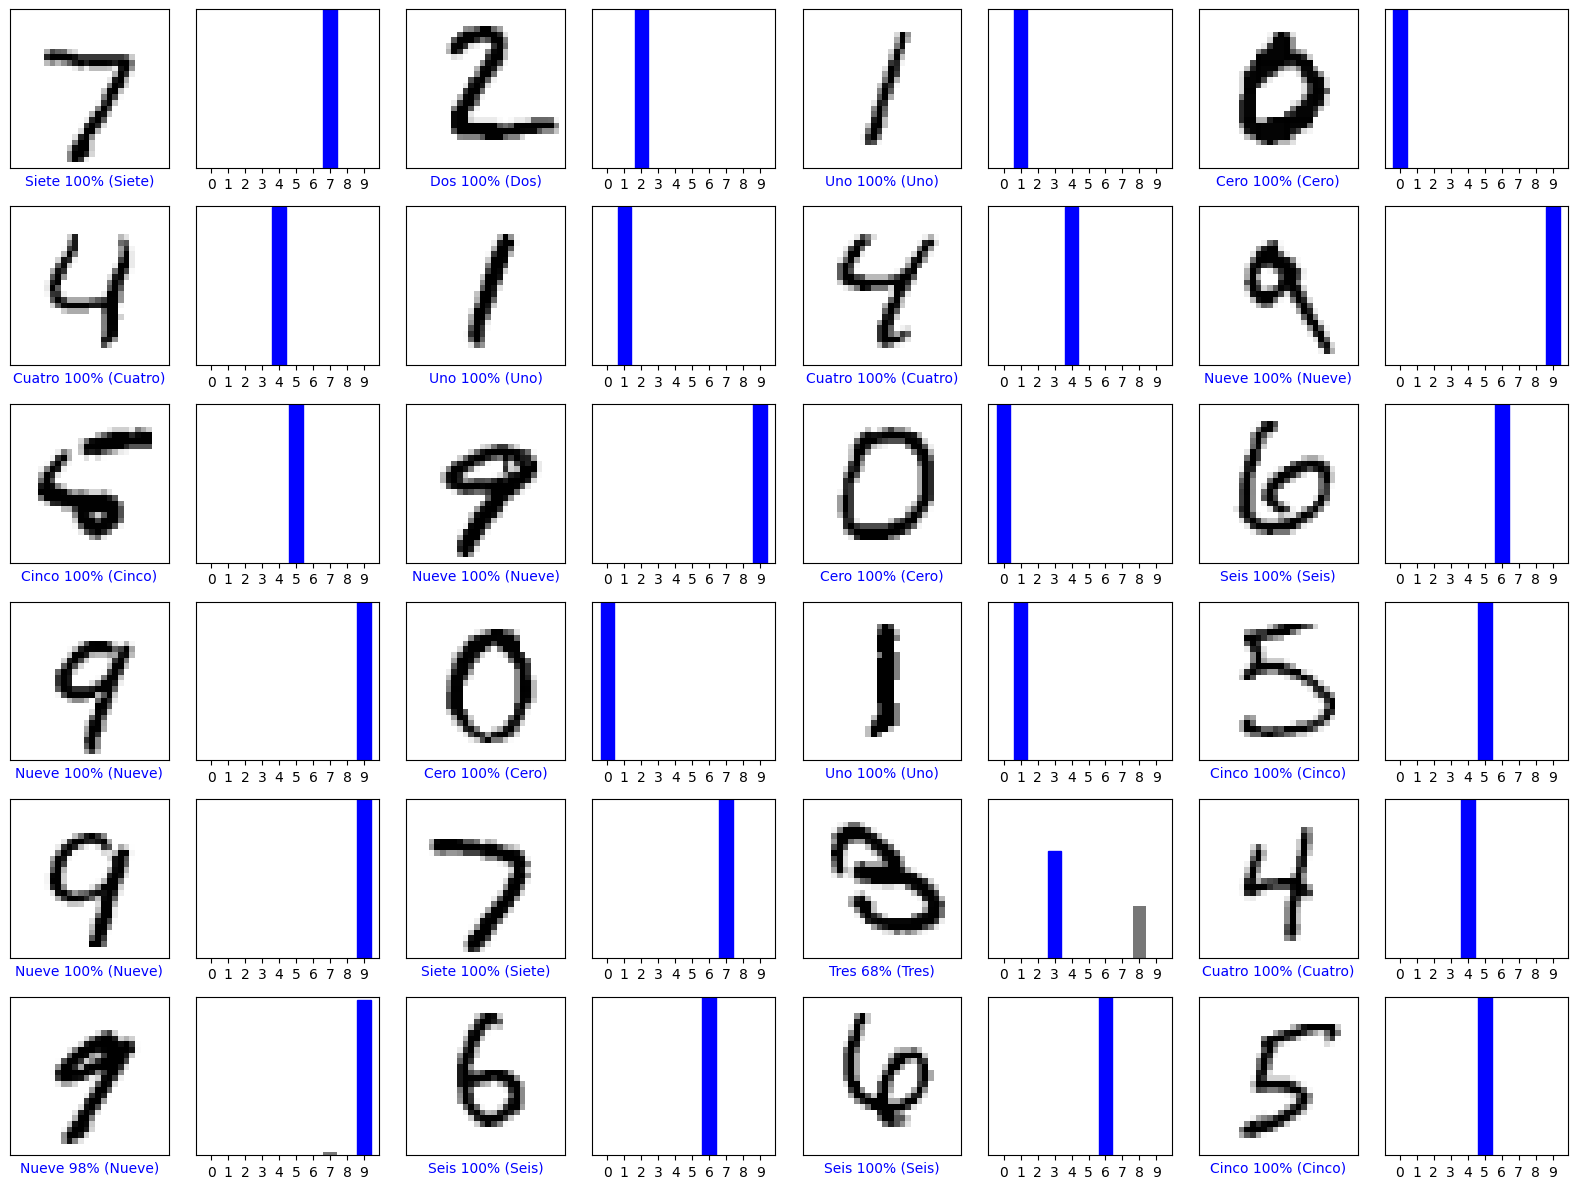

In [37]:
num_rows = 6
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predicciones[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predicciones[i], y_test)
plt.tight_layout()
plt.show()

Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una unica imagen.

In [41]:
img = x_test[1]
print(img.shape)

(28, 28)


In [42]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [43]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 20ms/step
[[1.3570044e-13 1.7092698e-07 9.9999988e-01 9.9275040e-11 1.0479975e-25
  7.9241565e-11 1.9478341e-10 4.4174878e-18 7.1430364e-09 3.7315604e-21]]


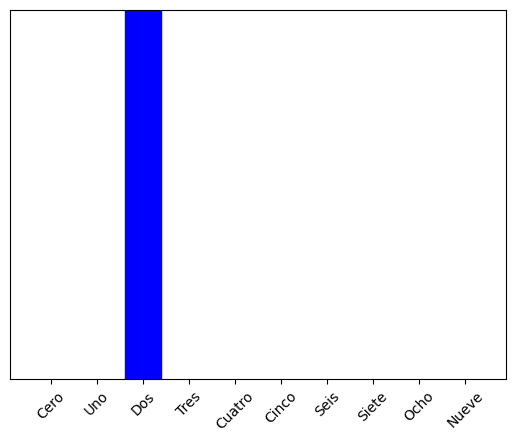

In [46]:
plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

2